In [18]:
#########################################################################################################
# Date: July 2021
# Author: Anneke Miedema and Astrid Alsema
# Purpose: annotate each cluster with a cluster annotation of core, rim (RIM), or perilesional WM (PL)
# Dataset: Visium Spatial Transcriptomics for MS lesions. WM slices.
# Output: plots corresponding to Extended Data Figure 4.

# Note: this is an example run for 1 clustering result 
# Spatial clusters were assigned to the rim based on their location surrounding a lesion core and overlapping cluster marker genes.

# Note: All results are stored as csv files containing spot barcodes with cluster annotations. 
# This can be found in data_files/figure 2 bayesspace clustering/annotated_barcodes

# Inputs:
# - manual decision which spatial clusters numbers belong to which identity group
# - indir : contains the "sampleID_sce_qX.rds" with final clustering results.
# - sample: a sampleID of samples to be processed e.g. "ST33"
#########################################################################################################

In [1]:
# load libraries
rm(list =ls())
library(BayesSpace)
library(forcats)
require(ggplot2)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

In [6]:
########################################## custom functions ###############################################
#' Date: July 2021
#' Author: Astrid Alsema
#' Prepare a Clustered BayesSpace Object for Annotation
#'
#' This function prepares a clustered BayesSpace SingleCellExperiment (sce) object by adding metadata for lesion type 
#' and sample ID. It also converts the spatial cluster information to a factor.
#'
#' @param sce SingleCellExperiment object, clustered with BayesSpace.
#' @param lesiontype Character string indicating the group the sample belongs to (e.g., "active", "CWM", "NAWM").
#' @param sample_ID Character string indicating the sample ID (e.g., "ST31").
#' 
#' @return A SingleCellExperiment object with added metadata and adjusted spatial cluster information.
#' @examples
#' sce <- readRDS(file = "path_to_rds_file.rds")
#' sce <- prep_sce(sce, lesiontype = "CWM", sample_ID = "ST31")

prep_sce <- function(sce, lesiontype, sample_ID) {
  print(clusterPlot(sce)) # original clusters
  sce$Group <- as.character(lesiontype) # add lesion type 
  sce$SampleID <- sample_ID
  sce$spatial.cluster <- factor(sce$spatial.cluster)
  return(sce)
}

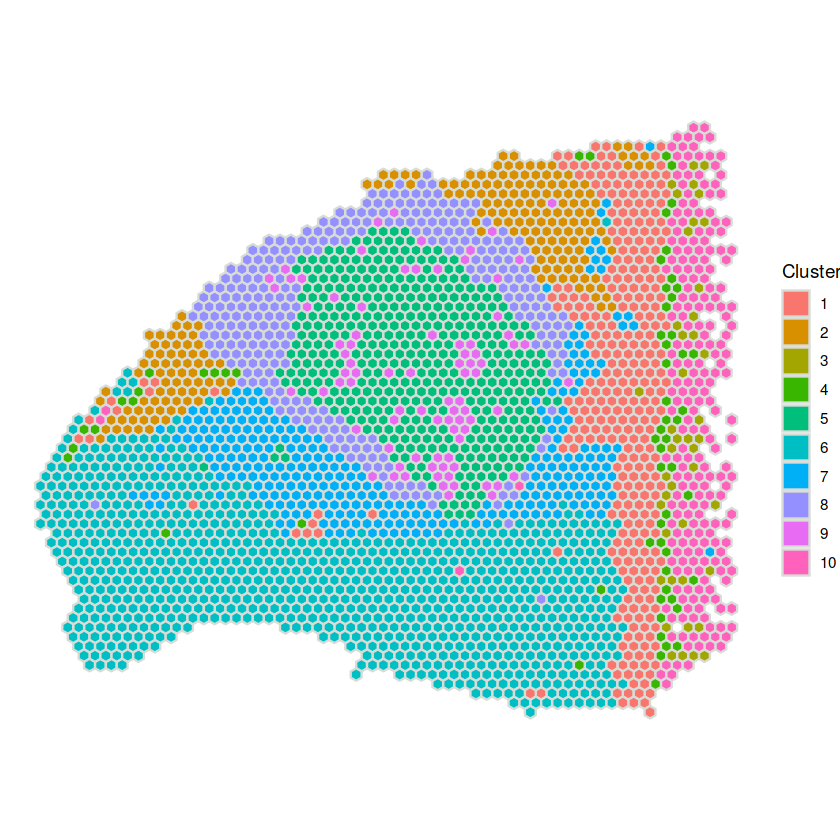

In [7]:
############# manual annotation of clustering #################################################

indir = "RData/BS/2.peregrine/"

# sample 1
sample <- "ST33"
sce <- readRDS(file = paste0(indir, sample, "_sce_q10.rds"))  

# website i used for the color palette
# https://colorswall.com/palette/469

sce.1 <- prep_sce(sce, lesiontype = "active", sample_ID = sample)

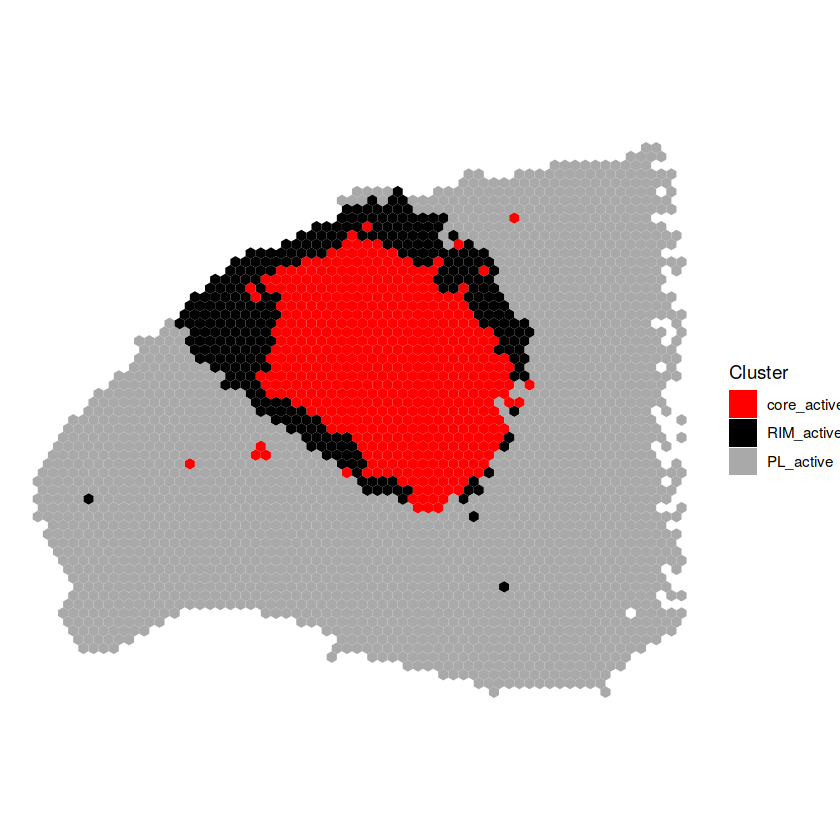

In [9]:
# manual annotation of identity
# sample 1
sce.1$subgroup <- fct_collapse(sce.1$spatial.cluster,
                               core_active = c("5", "9"), 
                               RIM_active = c("8"), 
                               PL_active = c("1", "2", "3", "4","6","10","7"))
sce.1$subgroup <- factor(sce.1$subgroup, levels = c("active", "RIM_active", "PL_active"))
sce.1$identity <- paste(sample, sce.1$subgroup, sep = "_") # make identity unique by adding the sampleID

clusterPlot(sce.1, label = "subgroup", palette = c("red", "black", "darkgrey"), color = NA) + theme(aspect_ratio = 1)
